## Compare Sage Lot Pond RTK v. 0.5-m DEMs
This makes a scatterplot of RTK elevations v. the elevations extracted from 0.5-m DEMs.
The DEMS were created in Global Mapper using only the points classified as "Ground" and gridded at 0.5-m.
The GM `Analysis/Measurement // Apply Elevations from Terrain Layers to Selected Feature(s)` was chosen.
The DEMs did not extend far enough north to include all of the RTK locations, so only the ones in the red boxes were used.

![RTK points on the 2014 DEM](RTK_points_on_2014_DEM.jpg "RTK points on the 2014 DEM")

The elevations were exported as separate `.csv` files called `RTK+2011_DEM.csv` and `RTK+2014_DEM.csv`. The elevations were copied to `Sage Lot Pond 2017_2018 RTK Surveys.xlsx`. The points were sorted by Northing, and the points north of 4601520 were removed. The differences and statistics were calculated in that spreadsheet, saved as `Sage Lot Pond 2017_2018 RTK Surveys_comp_DEMS.xlsx` and exported as `Sage Lot Pond 2017_2018 RTK Surveys_comp_DEMS.csv`, which is imported here to make the scatterplot.

In retrospect, I should have done all of this in Python after making the DEMs...

csherwood@usgs.gov 1 May 2018

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fn = 'Sage Lot Pond 2017_2018 RTK Surveys_comp_DEMS.csv'
# read the profile into a Pandas datafile
df=pd.read_csv(fn,delimiter=',',header=0)

# extract some columns as arrays
DEM2011 = df['2011.00'].values
DEM2014 = df['2014.00'].values
RTK = df['altitude_m'].values

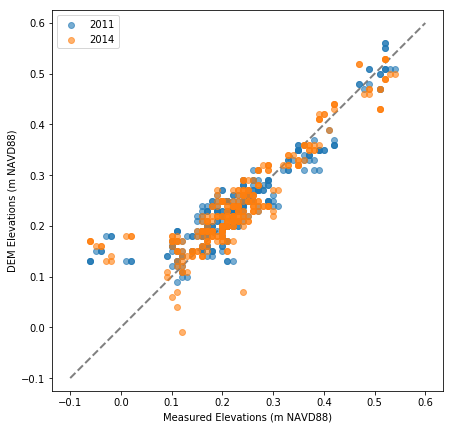

In [2]:
fig  = plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)
x = np.array((-.1,.6))
y = np.array((-.1,.6))
plt.plot(x,y, '--k', lw=2,zorder=0,color='gray')
plt.scatter(RTK,DEM2011,alpha=.6,label='2011')
plt.scatter(RTK,DEM2014,alpha=.6,label='2014')
ax.axis('square')
ax.axis('equal')
plt.legend(loc=2)
plt.xlabel('Measured Elevations (m NAVD88)')
plt.ylabel('DEM Elevations (m NAVD88)')
plt.savefig('RTK_DEM_scatterplot.png')
    